In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from scipy.signal import convolve
from scipy import ndimage
import getBayer
% matplotlib inline
import io
import time
import copy
from numpy.lib.stride_tricks import as_strided
from numpy import linalg as linalg

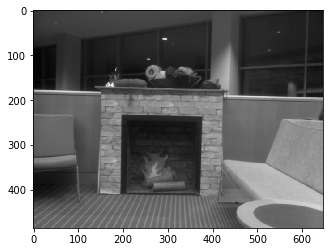

In [3]:
res = getBayer.get_bw_array('pic2.jpeg')
testIm = copy.deepcopy(res)
testIm = scipy.misc.imresize(testIm, .25)
plt.imshow(testIm, cmap = 'gray')

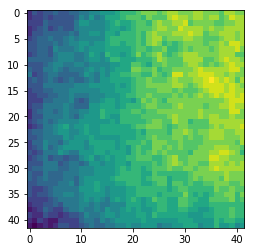

In [47]:
Im = testIm
(h,w) = Im.shape
r = 2 # this is the distance out from the variable pixel we sample. The full block has a side length of 2*r + 1
b = r*2 +1
train_block = Im[r:8*b+2*r,r:8*b+2*r]
(m,n) = train_block.shape
plt.imshow(train_block)

In [48]:
for i in range(r, r+n):
    for j in range(r, r+m):
        chunk = Im[j-r:j+r+1, i-r:i+r+1]
        if j == r  and i ==r:
            X = np.reshape(chunk, (b*b, 1))
        else:
            X = np.append(X, np.reshape(chunk, (b*b, 1)),axis=1)

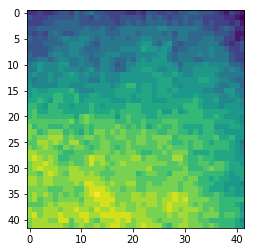

In [50]:
X.shape
plt.imshow(np.reshape(X[12,:], (m,n)))

In [59]:
mean_X = X.mean(axis=0)
X = X - mean_X
M = np.dot(X,X.T) # covariance matrix
e,EV = linalg.eigh(M) # eigenvalues and eigenvectors
tmp = np.dot(X.T,EV).T # this is the compact trick
V = tmp[::-1] # reverse since last eigenvectors are the ones we want
# S = np.sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
# for i in range(V.shape[1]):
#     V[:,i] /= S


In [60]:
V.shape
V[:,0]

array([  6.18591245e+00,  -5.11098804e-01,   8.99914741e-01,
        -5.15708053e-01,   8.26920407e-01,   4.56038854e-01,
         4.13883013e-01,  -3.94747359e-01,   1.00578303e+00,
         5.22657630e-02,  -3.81788687e-03,   7.56261452e-01,
        -4.73064398e-02,   5.79320699e-01,   1.91529768e-01,
        -8.68562992e-01,  -2.20900918e-01,  -9.26140243e-02,
         1.20881505e-01,   5.48128147e-02,   3.33447216e-01,
        -5.16123900e-01,   7.43527784e-01,  -3.12988348e-01,
        -1.07269749e-15])

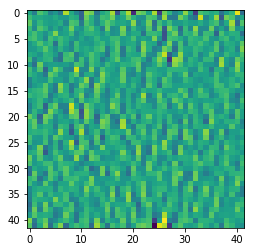

In [61]:
new = V[12,:]
new = np.reshape(new.T, (m,n))
plt.imshow(new/255)